In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
d = np.arange(5,6.01,0.01)
for i in d:
    pass
    #print(round(i,2))
# start=5
# while(start<=6):
#     print(round(start,2))
#     start += 0.01

In [ ]:
a = np.random.randint(50,1000,(5,5))

In [ ]:
a

array([[623, 538, 500, 738, 844],
       [236, 800, 224, 462, 380],
       [548, 274, 668, 923, 926],
       [225, 626, 276, 563, 869],
       [726, 699, 473, 249, 387]])

In [ ]:
df = pd.DataFrame(a, columns=["A","B","C","D","E"])
df

,A,B,C,D,E
0,623,538,500,738,844
1,236,800,224,462,380
2,548,274,668,923,926
3,225,626,276,563,869
4,726,699,473,249,387


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/University Files/5th Semester/ML Lab/data.csv")
data.dropna(1, inplace=True)
c = [float(i) for i in data.columns]
c
data.columns = ["A", "B", "C", "D", "E"]

<ipython-input-7-247bf4580ebd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data.dropna(1, inplace=True)


In [ ]:
d = list(data.index)
dat = pd.DataFrame(columns = ['A','B','C','D','E'])
dat.loc[0] = c

for i in d:
  dat.loc[i+1] = data.loc[i]
data = dat
data

,A,B,C,D,E
0,1.6,2.1,4.2,8.6,9.6
1,1.5,2.7,4.6,10.0,10.4
2,1.2,2.3,5.2,10.5,11.8
3,1.4,2.5,5.4,10.6,12.3
4,1.6,2.8,6.1,10.8,11.8
5,1.2,2.9,6.5,10.3,12.5
6,1.6,2.8,7.6,9.6,12.4
7,1.6,2.9,8.3,9.1,11.8


In [ ]:
#printing desciptive stats
data.describe()

,A,B,C,D,E
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.462500,2.625000,5.987500,9.937500,11.575000
std,0.176777,0.296407,1.429723,0.778162,1.034753
min,1.200000,2.100000,4.200000,8.600000,9.600000
25%,1.350000,2.450000,5.050000,9.475000,11.450000
50%,1.550000,2.750000,5.750000,10.150000,11.800000
75%,1.600000,2.825000,6.775000,10.525000,12.325000
max,1.600000,2.900000,8.300000,10.800000,12.500000


In [ ]:
darr = data.to_numpy()
darr = darr.reshape(darr.size)
darr.shape

(40,)

Text(0.5, 1.0, 'Frequency distribution using Histogram')

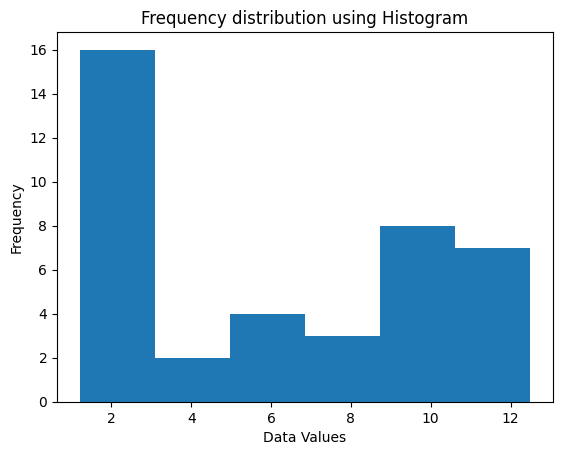

In [ ]:
#creating histograms with matplotlib
#plt.subplot(2,1,1)
plt.hist(darr, bins=6, range=[darr.min(), darr.max()]) #correct form
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.title("Frequency distribution using Histogram")
#using pandas dataframe
#plt.subplot(2,1,2)
#plt.hist(data, bins=6, range=[darr.min(), darr.max()])

Text(0.5, 1.0, 'Frequency distribution using Histogram')

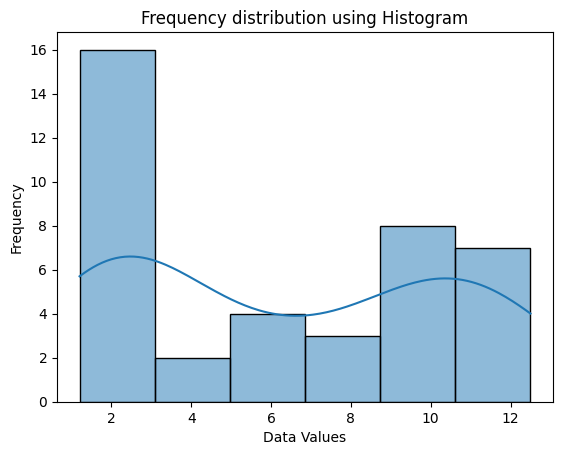

In [ ]:
sb.histplot(darr, kde=True, bins=6) #kernel density estimation curve READ about it
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.title("Frequency distribution using Histogram")

In [ ]:
print(max(darr), min(darr))

12.5 1.2


Text(0.5, 1.0, 'Frequency curve')

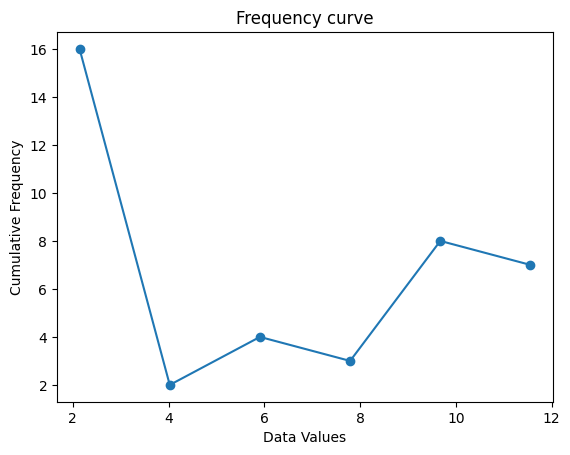

In [ ]:
#creating frequency distribution curve
hist, bin_edges = np.histogram(darr, bins=6, range=[min(darr), max(darr)])
bin_midpoints = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(bin_midpoints, hist, marker='o')
plt.xlabel("Data Values")
plt.ylabel("Cumulative Frequency")
plt.title("Frequency curve")

In [ ]:
from scipy.interpolate import interp1d

Median is  5.908333333333333


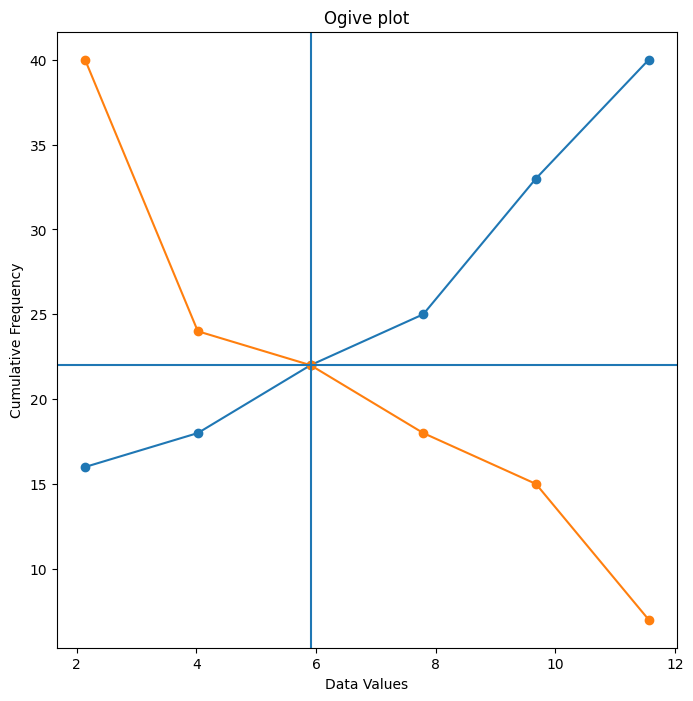

In [ ]:
#plot ogive and compute median
fig,ax = plt.subplots(figsize =(8,8))
cumulative_freq = np.cumsum(hist)
#cumulative_freq1 = np.cumsum(hist[-1::-1]) wrong plot
plt.plot(bin_midpoints, cumulative_freq, marker='o')
#more than ogive computation
cumulative_freq1 = np.zeros(hist.size)
cumulative_freq1[0] = max(cumulative_freq)
for i in range(1, hist.size):
    cumulative_freq1[i] = cumulative_freq1[i-1] - hist[i-1]
plt.plot(bin_midpoints, cumulative_freq1, marker='o')
a = cumulative_freq[cumulative_freq==cumulative_freq1]
f = interp1d(cumulative_freq, bin_midpoints)
my_y_val = a
my_x_val = float(f(my_y_val))
ax.axhline(y=my_y_val)
ax.axvline(x=float(my_x_val))
plt.xlabel("Data Values")
plt.ylabel("Cumulative Frequency")
plt.title("Ogive plot")
print("Median is ", my_x_val)

Text(0.5, 1.0, 'Frequency curve')

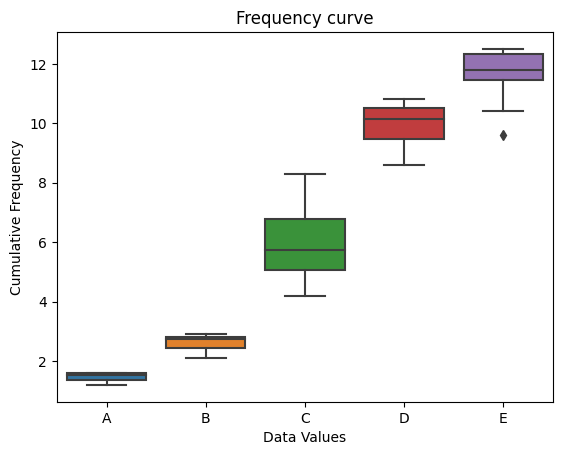

In [ ]:
#TODO: create box and stem-leaf plot for this data
#TODO: compute inferential stats about the data

sb.boxplot(data)
plt.xlabel("Data Values")
plt.ylabel("Cumulative Frequency")
plt.title("Frequency curve")

Text(0.5, 1.0, 'Frequency curve')

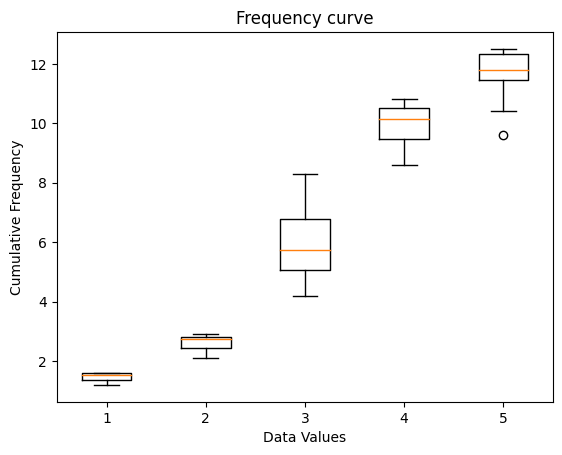

In [ ]:
plt.boxplot(data)   #creating boxplot with matplotlib
plt.xlabel("Data Values")
plt.ylabel("Cumulative Frequency")
plt.title("Frequency curve")

<StemContainer object of 3 artists>

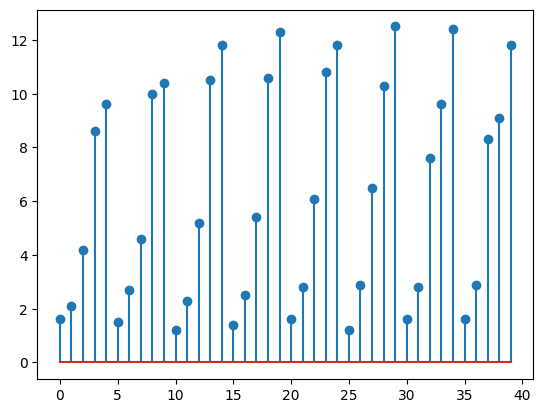

In [ ]:
plt.stem(darr) #stem and leaf plot with matplotlib

In [ ]:
data_mean = data.mean().mean() #computing mean of whole data

In [ ]:
#computing first, second and third quartiles

Q1 = np.quantile(darr, 0.25)
Q2 = np.quantile(darr, 0.5)
Q3 = np.quantile(darr, 0.75)

#calculate error between graphic and computed medians
error =  np.abs(my_x_val - Q2)
error

0.15833333333333321

In [ ]:
#compute sample standard deviation
std = np.std(darr)

#compute sample variance
var = std**2

print("Standard Deviation: {}, Variance: {}".format(std, var))

Standard Deviation: 4.035336881847661, Variance: 16.283943750000002


In [ ]:
#compute range of data
range = darr.max() - darr.min()
range

11.3

In [ ]:
#compute mode of data
#create unique keys of data as a set
s = set(darr)
s = list(s)
#create a dictionary keeping frequencies of each data value
count_dictionary = {}
for i in s:
  count_dictionary[i] = darr.tolist().count(i)
max_freq = max(count_dictionary.values())
print("Modes:-")
mode = []
j = 0
for i in count_dictionary.keys():
  if j==len(count_dictionary.keys()):
    break
  if count_dictionary[i]==max_freq:
    mode.append(i)
    print(i)
  j += 1

Modes:-
1.6


In [ ]:
#creating inference statistics
inference_stats = pd.DataFrame(columns = ["Graphically computed Median", "Q1", "Q2", "Q3", "Mean", "Mode", "Range", "Sample std", "Sample variance"])
inference_stats.loc[0] = [my_x_val, Q1, Q2, Q3, data_mean, mode, range, std, var]

#print inference stats
inference_stats

,Graphically computed Median,Q1,Q2,Q3,Mean,Mode,Range,Sample std,Sample variance
0,5.908333,2.45,5.75,10.325,6.3175,[1.6],11.3,4.035337,16.283944
